# Accessing and Modifying Pixel Values


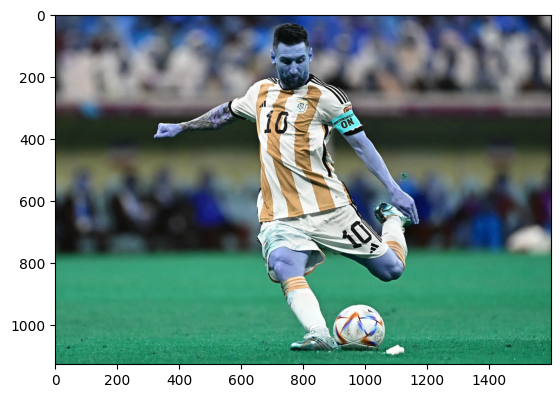

In [696]:
# Imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read Image
img = cv.imread('messi.jpg')
# View Image
plt.imshow(img)
plt.show()

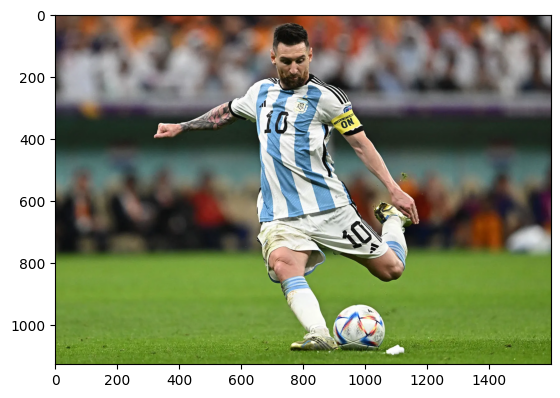

In [697]:
# by default cv.imread reads an image in BGR format however plt.imshow plots image in RGB format
# therefore converting the color format to display proper color representation of an image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Accessing a single pixel (Notes)
*   a single pixel is represented by pixel cordinates and pixel color
*   a pixel color is further represented using intensities of RGB color Channels


In [698]:
pixel = img[100,100]
pixel
# returns RGB color intensities of pixel at coordinate (100,100)
# here dtype = unit* represent the bit depths 2^8 = 256 intensity levels other bit depths(16 bit, 32 bit)

array([96, 69, 65], dtype=uint8)

In [699]:
# modifying pixel values
pixel = [255,255,255]
pixel

[255, 255, 255]

In [700]:
# accessing a single color channel of a pixel
img.item(10,10,1)
# here x = 10, y=10
# 2 represents index of RGB intensity list
# index 0 represent Blue
# index 1 represent Green
# index 2 represent Red
#this is when the color channel is set to BGR (i.e by default). color channel can be changed too
# returned is the intensity of red channel

71

In [701]:
# modifying RED values
#pixel channel values can be modified using itemset function
img.itemset((10,10,1),100)
img.item(10,10,2)

60

# Accessing Image Properties

In [702]:
# Image shape
#The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color):
img.shape

(1126, 1600, 3)

In [703]:
# total number of pixels is accessed by img.size
img.size

5404800

In [704]:
# Image datatype is obtained by `img.dtype`:
img.dtype

dtype('uint8')

## Image ROI

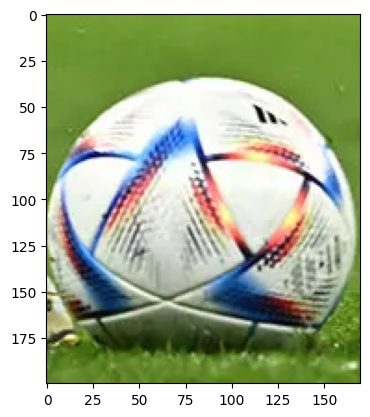

In [705]:
# since an image is just multidimentional numpy array. we can index it to select desired region of interest (ROI)
ball = img[900:1100, 895:1065]
plt.imshow(ball)
# selected ball from an image

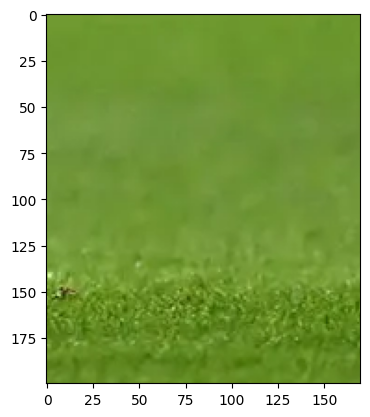

In [706]:
# similarly we can edit desired region of interest in a numpy arrray image with your own values
# lets replace the ball with a grass patch
grass_patch = img[900:1100, 1200:1370]
plt.imshow(grass_patch)

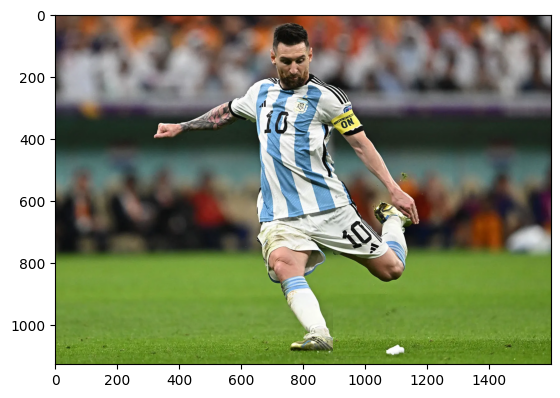

In [707]:
img[900:1100, 895:1065] = grass_patch
plt.imshow(img)

## Splitting And Merging Image Channels


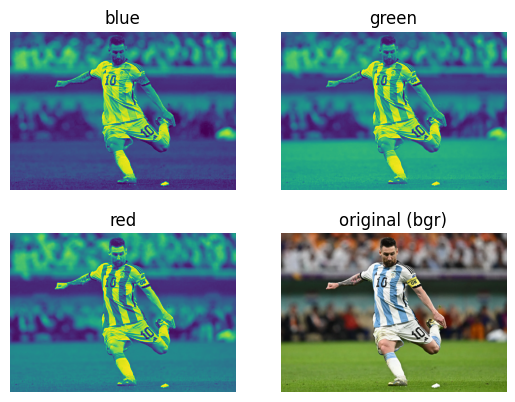

In [708]:
# We can split Images into its respective channels for example splitting an RGB image into separate R,G and B channel images
r,g,b = cv.split(img)

# plot blue channel
plt.subplot(221)
plt.imshow(b)
plt.title('blue')
plt.axis('off')

# plot green channel
plt.subplot(222)
plt.imshow(g)
plt.title('green')
plt.axis('off')

# plot red channel
plt.subplot(223)
plt.imshow(r)
plt.title('red')
plt.axis('off')

# plot original image
plt.subplot(224)
plt.imshow(img)
plt.title('original (bgr)')
plt.axis('off')

plt.show()

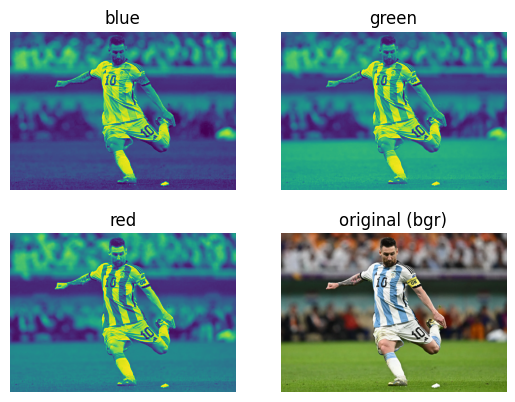

In [709]:
# Warning
# cv.split() is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.
# splitting could also be done using numpy indexing

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

# plot blue channel
plt.subplot(221)
plt.imshow(b)
plt.title('blue')
plt.axis('off')

# plot green channel
plt.subplot(222)
plt.imshow(g)
plt.title('green')
plt.axis('off')

# plot red channel
plt.subplot(223)
plt.imshow(r)
plt.title('red')
plt.axis('off')

# plot original image
plt.subplot(224)
plt.imshow(img)
plt.title('original (bgr)')
plt.axis('off')

plt.show()

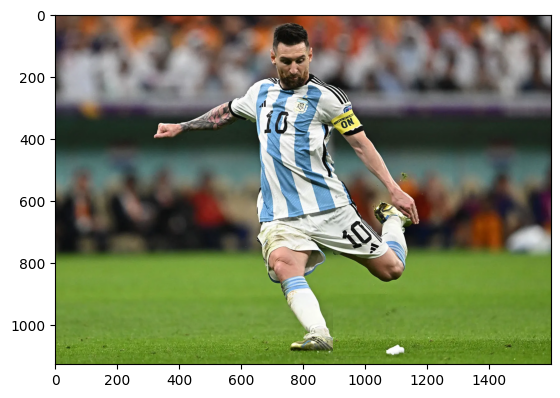

In [710]:
# similarly different channels can be merged too
new_img = cv.merge((r,g,b))
plt.imshow(new_img)
# merge can also be used to change color format
# converted image back to rbg

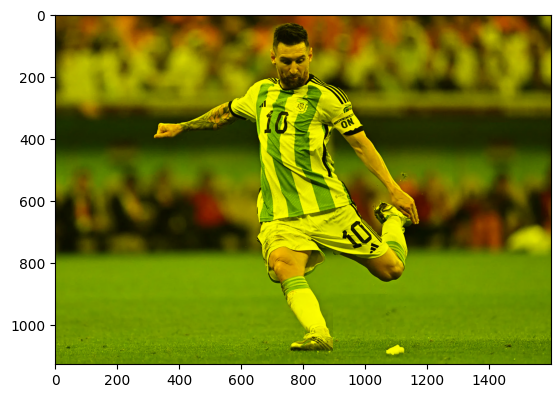

In [711]:
# Suppose you want to set all the red pixels to zero - you do not need to split the channels first. Numpy indexing is faster:
new_img[:,:,2] = 0
plt.imshow(new_img)

## Making Borders for Images (Padding)

In [712]:
# you can use cv.copyMakeBorder() If you want to create a border around an image, something like a photo frame or add padding.
# syntax of the function: cv.copyMakeBorder(src, top, bottom, left, right, borderType)
# options for borderType:
# BORDER_CONSTANT = 0
# BORDER_REPLICATE = 1
# BORDER_REFLECT = 2
# BORDER_REFLECT_101 = 3
# BORDER_WRAP = 4
# BORDER_TRANSPARENT = -1

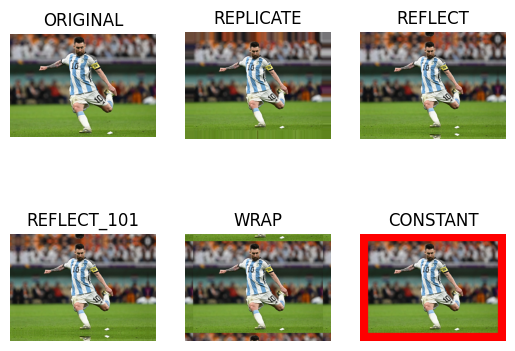

In [713]:
replicate = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_CONSTANT,value=[255,0,0]) # the value parameter is used with cv.BORDER_CONSTANT only and is used to define color (in this case it is blue)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL'),plt.axis('off')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE'),plt.axis('off')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT'),plt.axis('off')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101'),plt.axis('off')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP'),plt.axis('off')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT'),plt.axis('off')

plt.show()

#Apply the techniques on image of your own choice.
Access pixel values and modify them

Access image properties

Set a Region of Interest (ROI)

Split and merge images




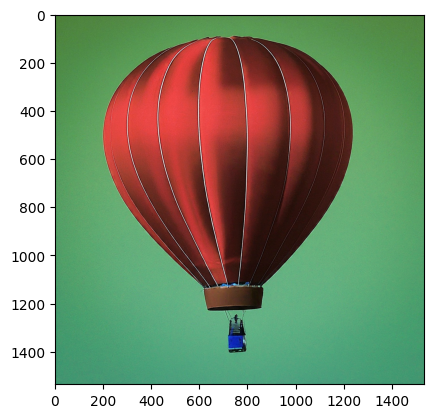

In [714]:
image = cv.imread('balloon.jpg')
plt.imshow(image)

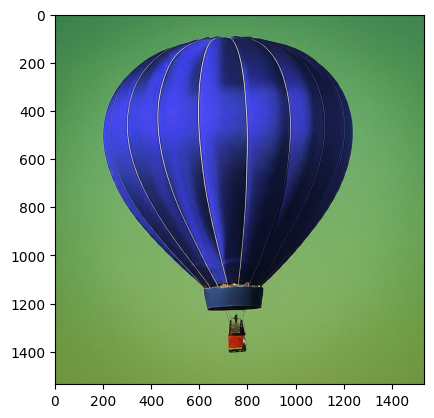

In [715]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)


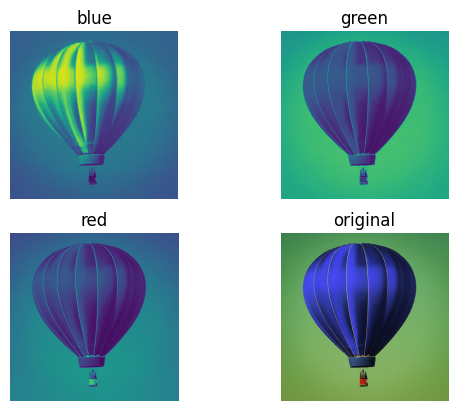

In [716]:
r,g,b = cv.split(image)

plt.subplot(221),plt.imshow(b),plt.title('blue'),plt.axis('off')
plt.subplot(222),plt.imshow(g),plt.title('green'),plt.axis('off')
plt.subplot(223),plt.imshow(r),plt.title('red'),plt.axis('off')
plt.subplot(224),plt.imshow(image),plt.title('original'),plt.axis('off')
plt.show()

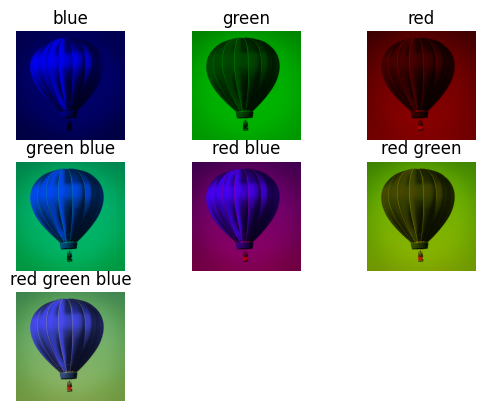

In [717]:
# lets view all possible color channel combiantions of this image
red = image[:,:,0] # blue channel
green = image[:,:,1] # green channel
blue = image[:,:,2] # red channel
zero = np.zeros(image.shape[:2],dtype="uint8") # black channel

# since red,blue,green extracted above only has one color intensitites therefore they have different dimension as np array
# and can not be displayed in rgb representation because plt.imshow() requires all color channels dimensions
# so we have convert these channels so they could be plotted using plt.imshow() as rgb color map

r = cv.merge((red,zero,zero)) # blue channel
g = cv.merge((zero,green,zero)) # green channel
b = cv.merge((zero,zero,blue)) # red channel



y = cv.merge((zero,green,blue)) # blue green channel also called yellow channel
m = cv.merge((red,zero,blue)) # blue red channel also called magenta channel
c = cv.merge((red,green,zero)) # green red channel also called cyan channel

rgb = cv.merge((red,green,blue)) # red green blue channel

plt.subplot(331),plt.imshow(b),plt.title('blue'),plt.axis('off')
plt.subplot(332),plt.imshow(g),plt.title('green'),plt.axis('off')
plt.subplot(333),plt.imshow(r),plt.title('red'),plt.axis('off')
plt.subplot(334),plt.imshow(y),plt.title('green blue'),plt.axis('off')
plt.subplot(335),plt.imshow(m),plt.title('red blue'),plt.axis('off')
plt.subplot(336),plt.imshow(c),plt.title('red green'),plt.axis('off')
plt.subplot(337),plt.imshow(rgb),plt.title('red green blue'),plt.axis('off')
plt.show()

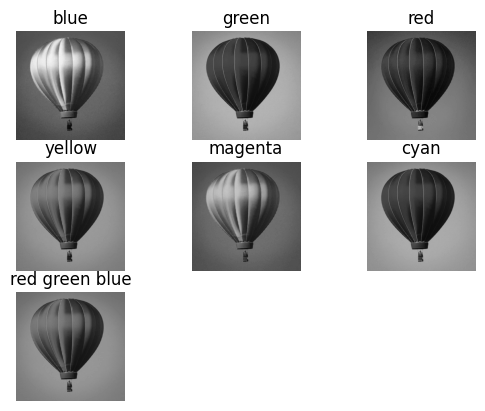

In [718]:
# we can choose color channel combinations, convert them and view them in gray scale in order to have better idea of the effects on intensity of pixels of the image
r = cv.cvtColor(r, cv.COLOR_BGR2GRAY)
g = cv.cvtColor(g, cv.COLOR_BGR2GRAY)
b = cv.cvtColor(b, cv.COLOR_BGR2GRAY)
y = cv.cvtColor(y, cv.COLOR_BGR2GRAY)
m = cv.cvtColor(m, cv.COLOR_BGR2GRAY)
c = cv.cvtColor(c, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY)

plt.subplot(331),plt.imshow(b,cmap='gray'),plt.title('blue'),plt.axis('off')
plt.subplot(332),plt.imshow(g,cmap='gray'),plt.title('green'),plt.axis('off')
plt.subplot(333),plt.imshow(r,cmap='gray'),plt.title('red'),plt.axis('off')
plt.subplot(334),plt.imshow(y,cmap='gray'),plt.title('yellow'),plt.axis('off')
plt.subplot(335),plt.imshow(m,cmap='gray'),plt.title('magenta'),plt.axis('off')
plt.subplot(336),plt.imshow(c,cmap='gray'),plt.title('cyan'),plt.axis('off')
plt.subplot(337),plt.imshow(rgb,cmap='gray'),plt.title('red green blue'),plt.axis('off')
plt.show()

In [719]:
# now let suppose i want to isolate the balloon from the background than we can see that the most suitable channel to apply thresholding on is green

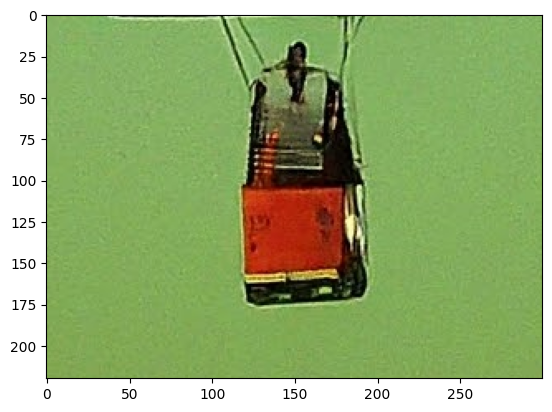

In [720]:
# now lets try to remove cart form the image

cart = image[1230:1450,600:900]
plt.imshow(cart)

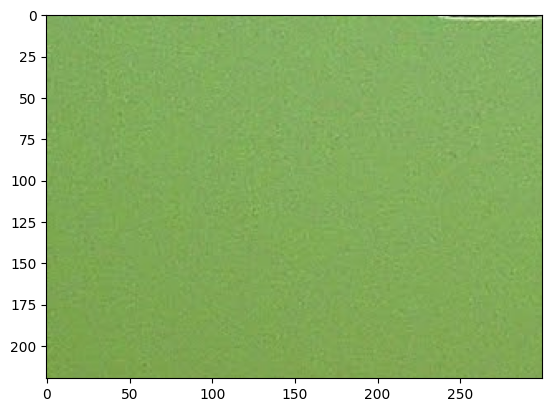

In [721]:
# randomly picking a color block
green_block = image[1230:1450,400:700]
plt.imshow(green_block)

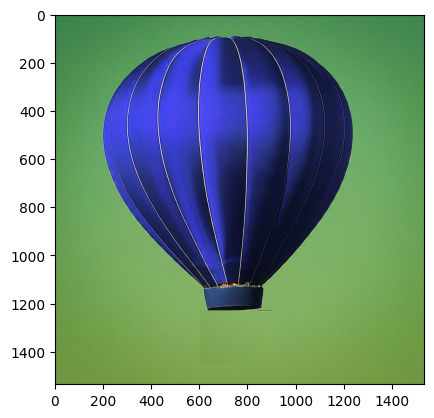

In [722]:
# replace cart with green block
image[1230:1450,600:900] = green_block
plt.imshow(image)


In [725]:
balloon_pixel_color = tuple(image[400, 700])
balloon_pixel_color

(63, 70, 212)

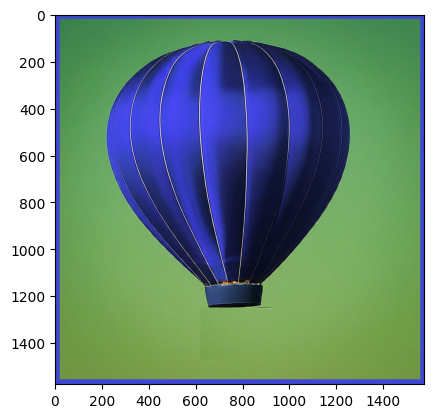

In [726]:
bordered_image = cv.copyMakeBorder(image,20,20,20,20,cv.BORDER_CONSTANT,value=(63,70,212))
plt.imshow(bordered_image)